# Part 5: Visualizations
This week we deal with visualizing result data both with the libraries matplotlib and seaborn
seaborn is great for quickly creating visually appealing plots with minimal code, while matplotlib offers more customization options and fine-grained control over every aspect of a plot.

In [9]:
import matplotlib.pyplot as plt
# Import libraries and read dataset
import pandas as pd
import seaborn as sns

data = pd.read_csv("titanic/train.csv")

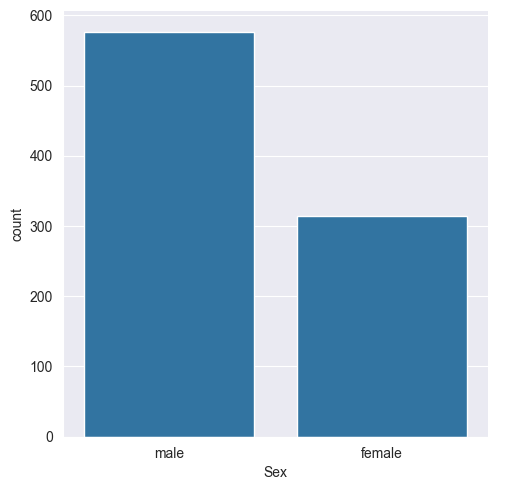

In [11]:
# Who were the passengers on the Titanic?
# Let's first check gender
# 'catplot()': Figure-level interface for drawing categorical plots onto a FacetGrid.
sns.catplot(x='Sex', data=data, kind='count')

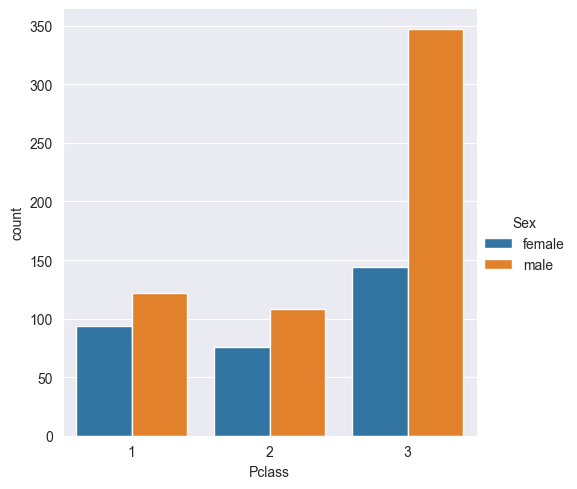

In [14]:
# Now let separate the gender by classes passing 'Sex' to the 'hue' parameter
# hue' => is used to visualize the data of different categories in one plot.
sns.catplot(x='Pclass', data=data, hue='Sex', kind='count') #With hue add third attribute

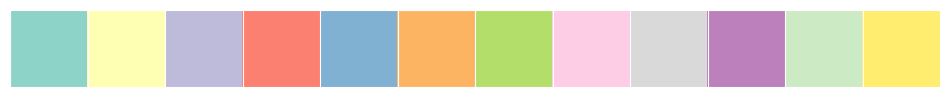

In [23]:
# seaborn.color_palette(palette=None, n_colors=None, desat=None) 
# Parameters: 
# palette:  Name of palette or None to return current palette. 
# n_colors:  Number of colors in the palette. 
# desat:  Proportion to desaturate each color. 

current_palette = sns.color_palette(palette='Set3')
sns.palplot(current_palette)
plt.show()

In [31]:
# However, it might be useful to know the split between males, females, and children. How can we go about this?
# Create a new column 'Person' in which every person under 16 is child.
data['Person'] = data['Sex'] # Why this?
data.loc[data['Age'] < 16, 'Person'] = 'Child'
# Test

# Checking the distribution
print(f"Person categories : {data.Person.unique()}\n=================================")
print(f"Distribution of person : {data.Person.value_counts()}\n=================================")
print(f"Mean age : {data.Age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : Person
male      537
female    271
Child      83
Name: count, dtype: int64
Mean age : 29.69911764705882


In [25]:
# Test of previous cell
data.loc[data['Age'] < 16, ["Name", "Pclass"]] # use : for all columns

,Name,Pclass
7,"Palsson, Master. Gosta Leonard",3
9,"Nasser, Mrs. Nicholas (Adele Achem)",2
10,"Sandstrom, Miss. Marguerite Rut",3
14,"Vestrom, Miss. Hulda Amanda Adolfina",3
16,"Rice, Master. Eugene",3
...,...,...
831,"Richards, Master. George Sibley",2
850,"Andersson, Master. Sigvard Harald Elias",3
852,"Boulos, Miss. Nourelain",3
869,"Johnson, Master. Harold Theodor",3


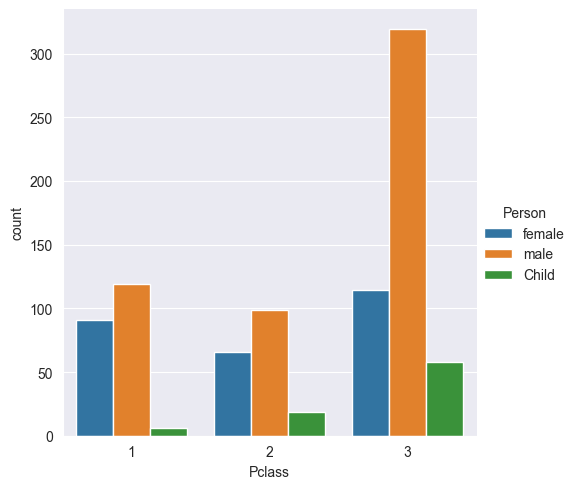

In [32]:
# Separation of the passengers between female, male, and child
sns.catplot(x='Pclass', data=data, hue='Person', kind='count')

Text(0, 0.5, 'Count')

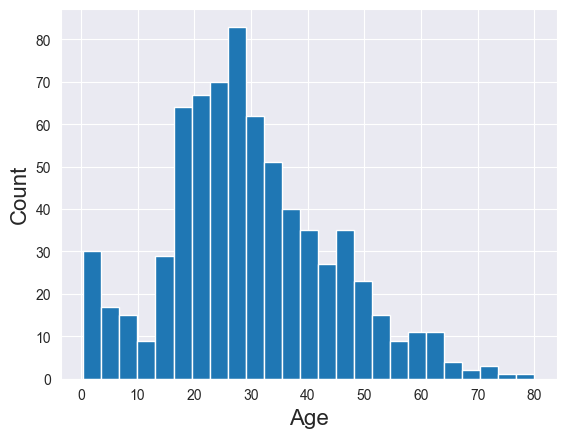

In [40]:
# Creating a distribution of the ages to get a more precise picture of who the passengers were?
# Visualizing the age distribution
# Matplotlib: We use the hist() function to create histogramsm, bins = number of intervalls
data['Age'].hist(bins=25)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)

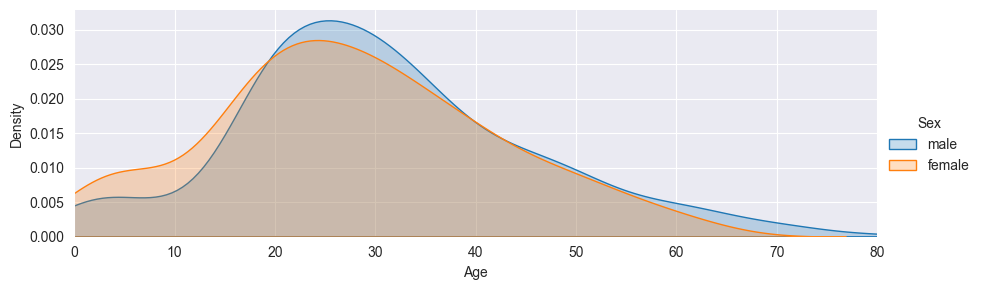

In [51]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram
fig = sns.FacetGrid(data, hue="Sex", aspect=3)
fig.map(sns.kdeplot, 'Age', fill=True) # Continuous function showing age distribution
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

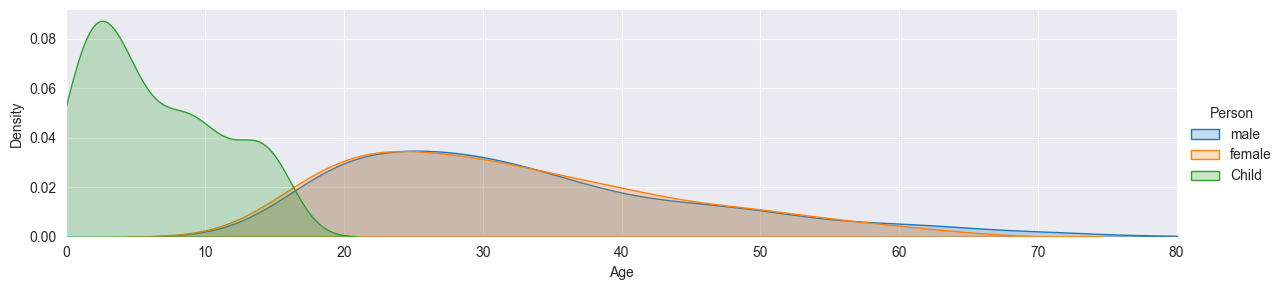

In [50]:
# We could have done the same thing for the 'person' column to include children:
fig = sns.FacetGrid(data, hue="Person", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

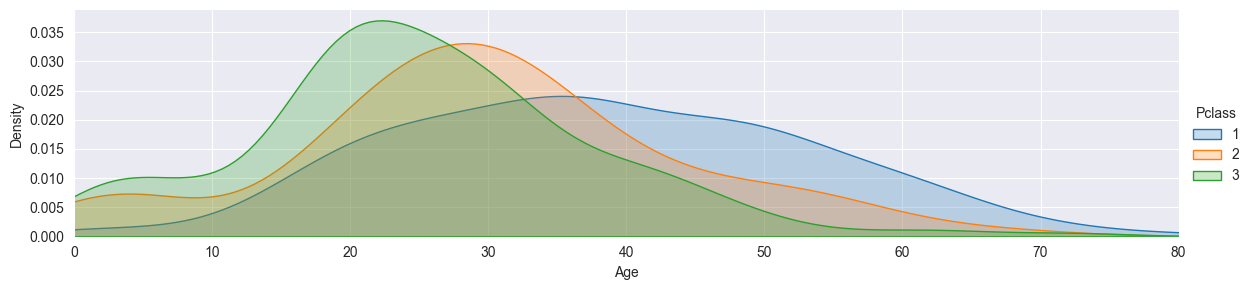

In [52]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(data, hue="Pclass", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

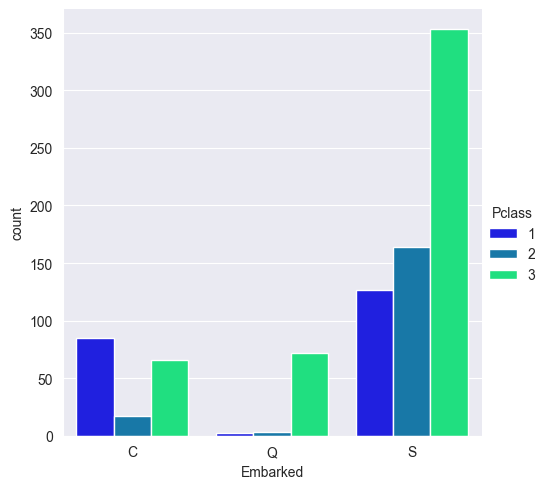

In [54]:
# Where did the passengers come from?
# Now we can make a quick factorplot to check out the results, note the order argument, used to deal with NaN values
sns.catplot(x='Embarked', data=data, hue='Pclass', kind='count', order=['C', 'Q', 'S'], palette='winter') #plaette can also be 'summer'


C:\Users\Philipp\AppData\Local\Temp\ipykernel_7056\1828303813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survivor', data=data, kind='count', palette=['red', 'green'])


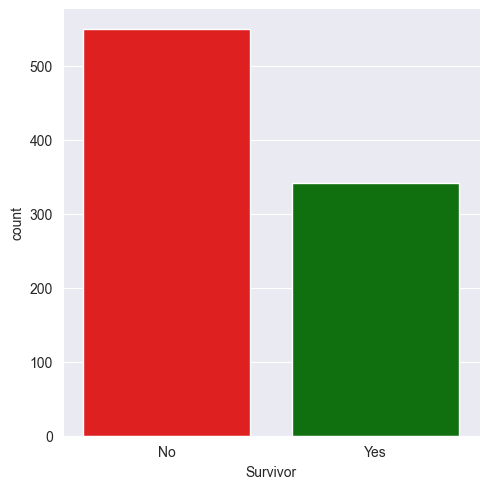

In [59]:
    # What factors helped someone survive the sinking?
# Let's start by creating a new column for legibility purposes through mapping
data['Survivor'] = data['Survived'].map({0: 'No', 1: 'Yes'})
# Let's just get a quick overall view of survied vs died. 
sns.catplot(x='Survivor', data=data, kind='count', palette=['red', 'green'])

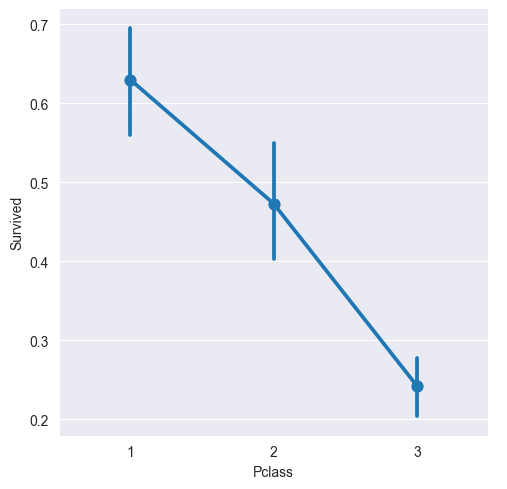

In [62]:
# Let's use a factor plot again, but now considering class
sns.catplot(x='Pclass', y="Survived", data=data, kind='point')

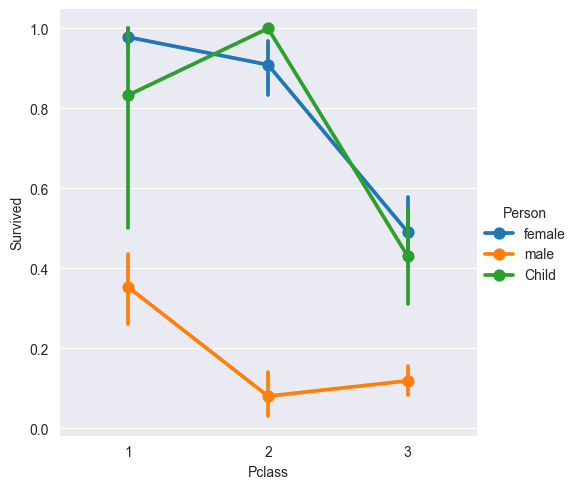

In [63]:
# Let's use a factor plot again, but now considering class and gender
sns.catplot(x='Pclass', y='Survived', data=data, hue='Person', kind='point')

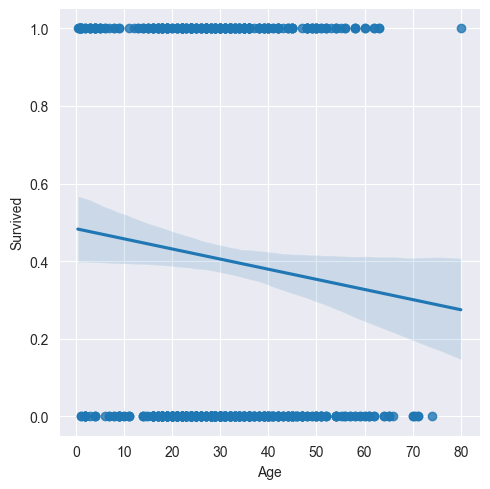

In [66]:
# But what about age? Did being younger or older have an effect on the survival rate?
# Let's use a linear plot on age versus survival
# The lineplot (lmplot) is one of the most basic plots. It shows a line on a 2-dimensional plane.
sns.lmplot(x='Age', y='Survived', data=data) #Scatterplot across two dimensions?